# Support vector machine
- It is used for regression as well as classification, primarily for classification.
- The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.
- SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

**Linear SVM:** Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.    
**Non-linear SVM:** Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.


In [1]:
%%HTML
 <img src="svm.png" alt="RF" width="500" height="600"> 

## Classifying Muffins and Cupcakes with SVM

##### Import required libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook

%matplotlib inline

 ##### Read data from csv file 

In [3]:
# Read in muffin and cupcake ingredient data

recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
recipes.head(5)

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


##### Prepare data

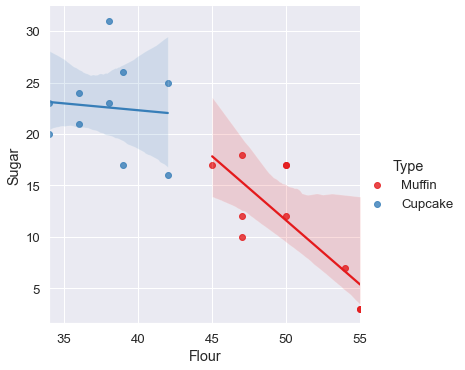

In [4]:
# Plot two ingredients

sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1')
plt.show()

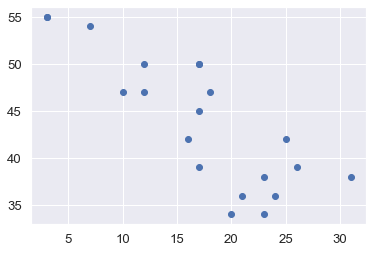

In [5]:
# See scater plot to visualize the data distribution

plt.scatter(recipes.Sugar,recipes.Flour)
plt.show()

In [6]:
# Specify inputs for the model

ingredients = recipes[['Flour','Sugar']]
ingredients[:3]

,Flour,Sugar
0,55,3
1,47,12
2,47,18


In [7]:
recipes.Type[:2]

0    Muffin
1    Muffin
Name: Type, dtype: object

In [8]:
# Output y ==> convert muffin as 0 and Cupcake as 1

type_label = np.where(recipes['Type']=='Muffin', 0, 1)

In [9]:
type_label[:3]

array([0, 0, 0])

##### Train the model
As scater plot is linear in nature use linear kernel

In [10]:
model = svm.SVC(kernel='linear') 
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [11]:
# Check data accuracy

model.score(ingredients, type_label)*100

100.0

In [12]:
# Fit the SVM model

model2 = svm.SVC()
model2.fit(ingredients, type_label)

# check data accuracy
model2.score(ingredients, type_label)*100

95.0

##### Visualize Results

In [13]:
# Get coefficient of line

model.coef_

array([[-6.66503014e-01, -7.77156117e-16]])

In [14]:
# Get intercept of line

model.intercept_

array([28.99296292])

In [15]:
# Prediction

model.predict([[42,20]])

array([1])

In [16]:
# Get support vectors

model.support_vectors_

array([[45., 17.],
       [42., 16.],
       [42., 25.]])

In [17]:
# Use numpy to get linearly distributed data point values

np.linspace(30, 60)

array([30.        , 30.6122449 , 31.2244898 , 31.83673469, 32.44897959,
       33.06122449, 33.67346939, 34.28571429, 34.89795918, 35.51020408,
       36.12244898, 36.73469388, 37.34693878, 37.95918367, 38.57142857,
       39.18367347, 39.79591837, 40.40816327, 41.02040816, 41.63265306,
       42.24489796, 42.85714286, 43.46938776, 44.08163265, 44.69387755,
       45.30612245, 45.91836735, 46.53061224, 47.14285714, 47.75510204,
       48.36734694, 48.97959184, 49.59183673, 50.20408163, 50.81632653,
       51.42857143, 52.04081633, 52.65306122, 53.26530612, 53.87755102,
       54.48979592, 55.10204082, 55.71428571, 56.32653061, 56.93877551,
       57.55102041, 58.16326531, 58.7755102 , 59.3877551 , 60.        ])

In [18]:
# Get the separating hyperplane

w = model.coef_[0]
print(w)
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors

b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

[-6.66503014e-01 -7.77156117e-16]


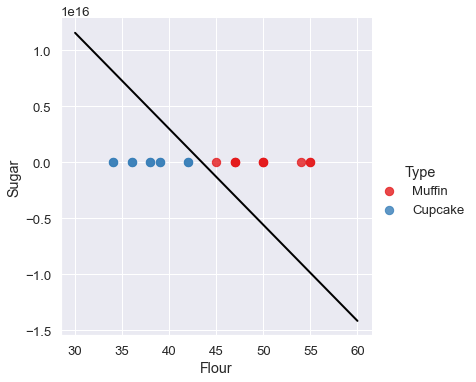

In [19]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

In [20]:
model.support_vectors_[:,1]

array([17., 16., 25.])

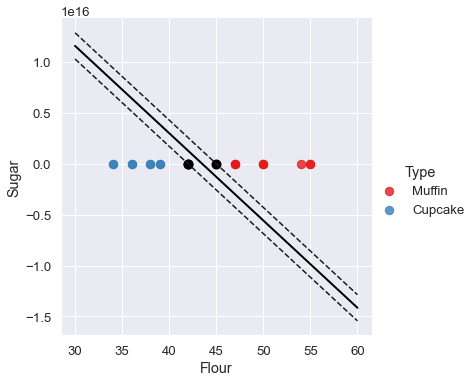

In [21]:
# Look at the margins and support vectors
# data samples
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

plt.plot(xx, yy, linewidth=2, color='black') # Hyperplane
plt.plot(xx, yy_down, 'k--') # MarginLine1
plt.plot(xx, yy_up, 'k--') # MargineLine2
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='black');

##### Predict New Case

In [22]:
# Create a function to guess when a recipe is a muffin or a cupcake

def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [23]:
# Predict if 20 parts flour and 30 parts sugar

muffin_or_cupcake(20,30)

You're looking at a cupcake recipe!


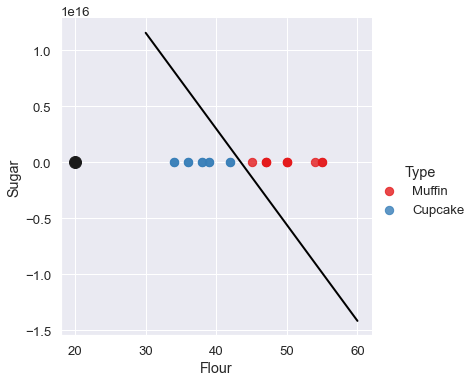

In [24]:
# Plot the point to visually see where the point lies

sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(20, 30, 'ko', markersize='12');